In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv('dataset.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
df.drop(columns=['Id'], inplace=True)

In [7]:
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna('None', inplace=True)
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoding = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoding[col] = le

In [11]:
from sklearn.model_selection import train_test_split
y = df['SalePrice']
X = df.drop(columns=['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

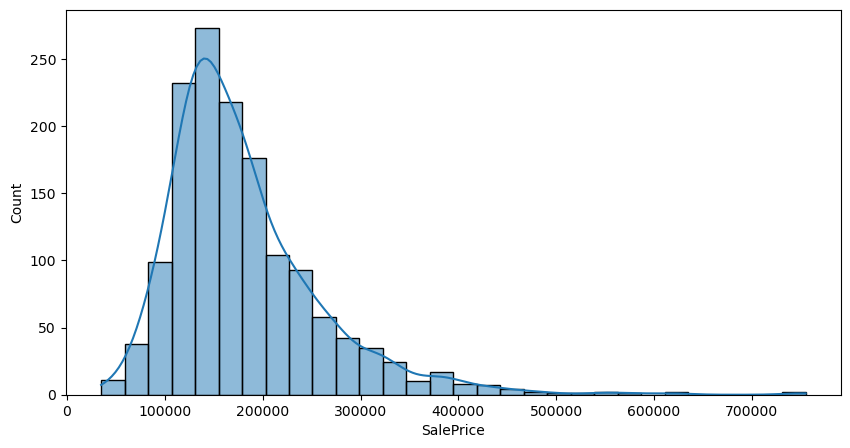

In [13]:
plt.figure(figsize=(10,5))
sns.histplot(df['SalePrice'], bins=30, kde=True)
plt.show()

<Axes: >

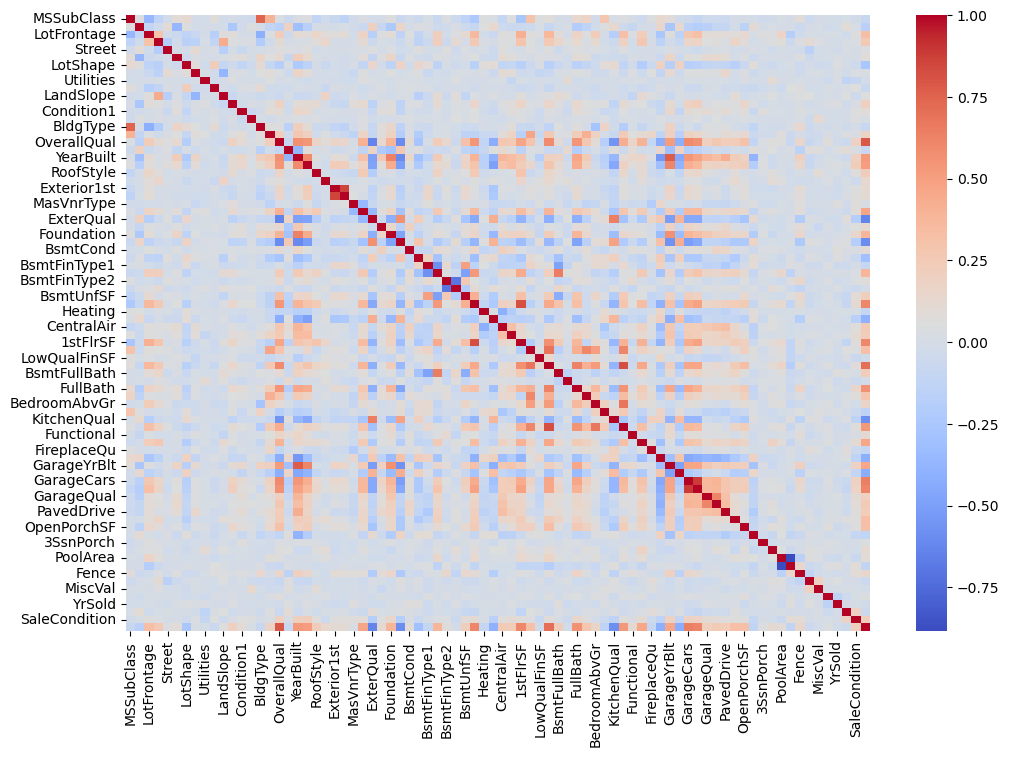

In [14]:
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)

In [15]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge

In [16]:
models = {
    'Linear Regression':LinearRegression(),
    'Ridge Regression':Ridge(),
    'RandomForestRegressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, median_absolute_error, explained_variance_score, max_error

In [18]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"{name} Metrics:")
    print('MAE: ',mean_absolute_error(y_test, y_pred))
    print('MSE:', mean_squared_error(y_test, y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))
    print('RSquare:',r2_score(y_test, y_pred))
    print('MAPE:',mean_absolute_percentage_error(y_test, y_pred))
    print('Medae:', median_absolute_error(y_test, y_pred))
    print('Explained Variance:', explained_variance_score(y_test, y_pred))
    print('Max Error:', max_error(y_test, y_pred))
    print("------------------------------------------")

Linear Regression Metrics:
MAE:  21785.707857542046
MSE: 1207136492.161129
RMSE: 34743.86985010635
RSquare: 0.8426225352671393
MAPE: 0.13049620285217914
Medae: 15060.904654786857
Explained Variance: 0.8437936786395297
Max Error: 230289.88654264226
------------------------------------------
Ridge Regression Metrics:
MAE:  21774.614179158805
MSE: 1206081941.7817304
RMSE: 34728.69047029747
RSquare: 0.8427600196909973
MAPE: 0.13039964421696096
Medae: 15037.822306996779
Explained Variance: 0.8439265207435803
Max Error: 230540.1216261268
------------------------------------------
RandomForestRegressor Metrics:
MAE:  17582.187397260273
MSE: 801943589.872467
RMSE: 28318.608544073402
RSquare: 0.8954485678691159
MAPE: 0.1079499309780749
Medae: 10811.934999999998
Explained Variance: 0.8955215401698823
Max Error: 172726.72999999998
------------------------------------------
GradientBoostingRegressor Metrics:
MAE:  17723.409206558772
MSE: 903106669.3569951
RMSE: 30051.733217187244
RSquare: 0.882259